In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/covid_19_india.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
df.shape

(7786, 9)

In [ ]:
top_confirmed = df.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values(ascending=False).to_frame()
top_confirmed.head()

,Confirmed
State/UnionTerritory,
Maharashtra,105538919
Tamil Nadu,50167412
Andhra Pradesh,48200952
Karnataka,42342521
Uttar Pradesh,28088092


In [ ]:
top_confirmed.style.background_gradient(cmap='Blues')

,Confirmed
State/UnionTerritory,
Maharashtra,105538919
Tamil Nadu,50167412
Andhra Pradesh,48200952
Karnataka,42342521
Uttar Pradesh,28088092
Delhi,25301742
West Bengal,19567105
Odisha,14164794
Bihar,14139595


In [ ]:
df = df.sort_values('Confirmed',ascending=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


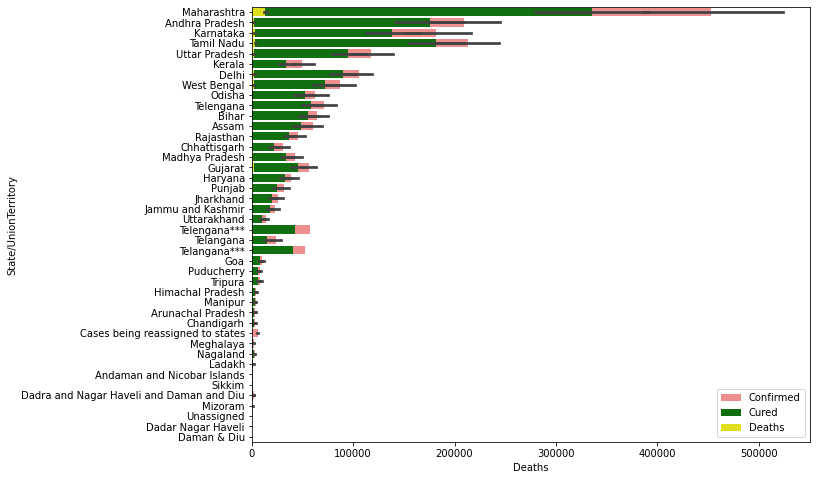

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(df['Confirmed'],df['State/UnionTerritory'],color='red',label='Confirmed',alpha=0.5)
sns.barplot(df['Cured'],df['State/UnionTerritory'],color='green',label='Cured')
sns.barplot(df['Deaths'],df['State/UnionTerritory'],color='yellow',label='Deaths')
plt.legend(loc=4)
plt.show()

In [ ]:
covid = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
covid.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0.0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0.0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0.0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0.0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0.0,Africa


In [ ]:
covid['Active'] = covid['Confirmed'] - covid['Recovered'] - covid['Deaths']
covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df = covid[covid['Country/Region'] == 'India']

In [ ]:
active = df.groupby('Date')['Active'].sum().reset_index()
confirmed = df.groupby('Date')['Confirmed'].sum().reset_index()

In [ ]:
active.tail()

,Date,Active
117,2020-05-18,57939.0
118,2020-05-19,60864.0
119,2020-05-20,63172.0
120,2020-05-21,66089.0
121,2020-05-22,69244.0


In [ ]:
confirmed.tail()

,Date,Confirmed
117,2020-05-18,100328
118,2020-05-19,106475
119,2020-05-20,112028
120,2020-05-21,118226
121,2020-05-22,124794


In [ ]:
active.rename(columns={'Date':'ds','Active':'y'},inplace=True)

In [ ]:
active.head(5)

,ds,y
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


In [ ]:
from fbprophet import Prophet

In [ ]:
model = Prophet(daily_seasonality=True)

In [ ]:
model.fit(active)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=7)
future.tail()

,ds
124,2020-05-25
125,2020-05-26
126,2020-05-27
127,2020-05-28
128,2020-05-29


In [ ]:
forecasting = model.predict(future)

In [ ]:
forecasting.tail(7)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
122,2020-05-23,68012.038396,67128.744486,68535.278065,68012.038396,68013.506569,-192.972430,-192.972430,-192.972430,-31.846855,-31.846855,-31.846855,-161.125575,-161.125575,-161.125575,0.0,0.0,0.0,67819.065966
123,2020-05-24,69865.852506,69083.653188,70463.934579,69839.341294,69907.040310,-98.501504,-98.501504,-98.501504,-31.846855,-31.846855,-31.846855,-66.654648,-66.654648,-66.654648,0.0,0.0,0.0,69767.351002
124,2020-05-25,71719.666616,71050.058653,72399.311816,71631.430941,71816.217940,7.929842,7.929842,7.929842,-31.846855,-31.846855,-31.846855,39.776698,39.776698,39.776698,0.0,0.0,0.0,71727.596458
125,2020-05-26,73573.480726,72829.322996,74241.149461,73404.688301,73746.810188,-13.758831,-13.758831,-13.758831,-31.846855,-31.846855,-31.846855,18.088024,18.088024,18.088024,0.0,0.0,0.0,73559.721894
126,2020-05-27,75427.294835,74665.713835,76275.356962,75166.429627,75710.768687,-13.146549,-13.146549,-13.146549,-31.846855,-31.846855,-31.846855,18.700306,18.700306,18.700306,0.0,0.0,0.0,75414.148286
127,2020-05-28,77281.108945,76550.102716,78192.881624,76914.826032,77667.054367,36.128129,36.128129,36.128129,-31.846855,-31.846855,-31.846855,67.974984,67.974984,67.974984,0.0,0.0,0.0,77317.237074
128,2020-05-29,79134.923055,78322.062274,80026.793395,78676.153915,79617.517240,51.393356,51.393356,51.393356,-31.846855,-31.846855,-31.846855,83.240211,83.240211,83.240211,0.0,0.0,0.0,79186.316411


In [ ]:
forecasting[['ds','trend','yhat_lower','yhat_upper']].tail(7)

,ds,trend,yhat_lower,yhat_upper
122,2020-05-23,68012.038396,67128.744486,68535.278065
123,2020-05-24,69865.852506,69083.653188,70463.934579
124,2020-05-25,71719.666616,71050.058653,72399.311816
125,2020-05-26,73573.480726,72829.322996,74241.149461
126,2020-05-27,75427.294835,74665.713835,76275.356962
127,2020-05-28,77281.108945,76550.102716,78192.881624
128,2020-05-29,79134.923055,78322.062274,80026.793395


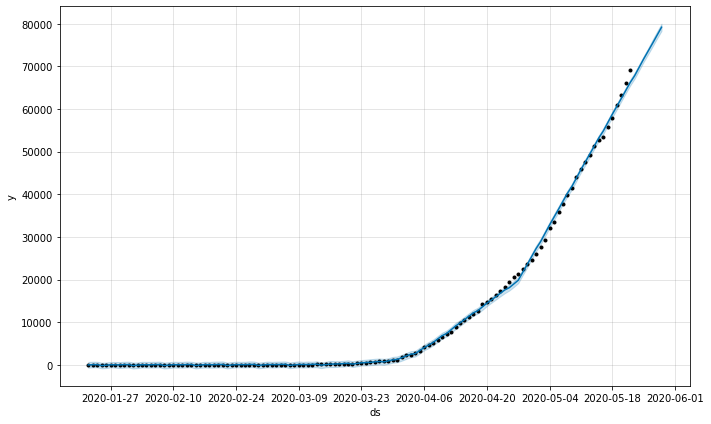

In [ ]:
active_plot = model.plot(forecasting)

In [ ]:
confirmed.rename(columns={'Date':'ds','Confirmed':'y'},inplace=True)

In [ ]:
confirmed

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
117,2020-05-18,100328
118,2020-05-19,106475
119,2020-05-20,112028
120,2020-05-21,118226


In [ ]:
model = Prophet(daily_seasonality=True, interval_width=0.95)   #confidance level
model.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=7)
future.tail()

,ds
124,2020-05-25
125,2020-05-26
126,2020-05-27
127,2020-05-28
128,2020-05-29


In [ ]:
forecasting = model.predict(future)

In [ ]:
forecasting.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
124,2020-05-25,123755.039146,119219.590009,127628.735493,123174.006987,124329.189035,-210.101596,-210.101596,-210.101596,-161.273887,-161.273887,-161.273887,-48.827710,-48.827710,-48.827710,0.0,0.0,0.0,123544.937549
125,2020-05-26,127260.225124,122987.037998,131641.787558,126281.027787,128177.981365,-150.265835,-150.265835,-150.265835,-161.273887,-161.273887,-161.273887,11.008051,11.008051,11.008051,0.0,0.0,0.0,127109.959289
126,2020-05-27,130765.411103,126227.097052,134963.514147,129417.153088,132046.394136,-83.780920,-83.780920,-83.780920,-161.273887,-161.273887,-161.273887,77.492967,77.492967,77.492967,0.0,0.0,0.0,130681.630183
127,2020-05-28,134270.597081,130081.666948,138737.529531,132579.750899,135904.803271,45.594186,45.594186,45.594186,-161.273887,-161.273887,-161.273887,206.868073,206.868073,206.868073,0.0,0.0,0.0,134316.191267
128,2020-05-29,137775.783059,133035.572477,142670.622547,135485.553770,139827.437337,140.268451,140.268451,140.268451,-161.273887,-161.273887,-161.273887,301.542338,301.542338,301.542338,0.0,0.0,0.0,137916.051510


In [ ]:
forecasting[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
107,2020-05-08,51220.688691,48918.654312,53705.704399
108,2020-05-09,53023.519699,50741.098396,55245.975206
109,2020-05-10,54863.261799,52473.166751,57196.912607
110,2020-05-11,56760.758708,54358.260867,59208.548268
111,2020-05-12,58589.283314,56180.307672,60992.724081
112,2020-05-13,60456.145760,57898.833401,62769.727284
113,2020-05-14,62305.674784,59804.166351,64855.523010


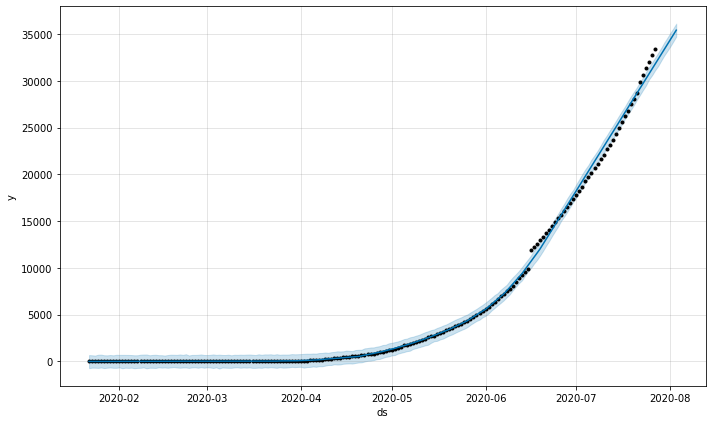

In [ ]:
confirmed_plot = model.plot(forecasting)

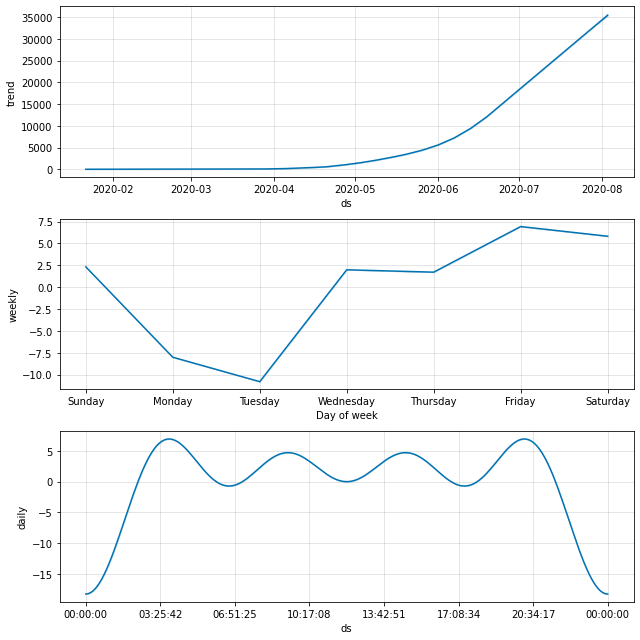

In [ ]:
fig2 = model.plot_components(forecasting)

In [ ]:
Death = df.groupby('Date')['Deaths'].sum().reset_index()

In [ ]:
Death.rename(columns={'Date':'ds','Deaths':'y'},inplace=True)

In [ ]:
model = Prophet(daily_seasonality=True, interval_width=0.95)   #confidance level
model.fit(Death)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=7)
future.tail()

,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [ ]:
forecasting = model.predict(future)

In [ ]:
forecasting[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
122,2020-05-23,3677.369997,3615.491262,3738.924448
123,2020-05-24,3788.434240,3726.887587,3852.040284
124,2020-05-25,3903.119419,3844.814667,3969.454294
125,2020-05-26,4014.418765,3945.633133,4088.180701
126,2020-05-27,4123.016440,4045.748010,4194.911856
127,2020-05-28,4233.948690,4156.453527,4310.460894
128,2020-05-29,4342.027075,4250.469785,4437.071940


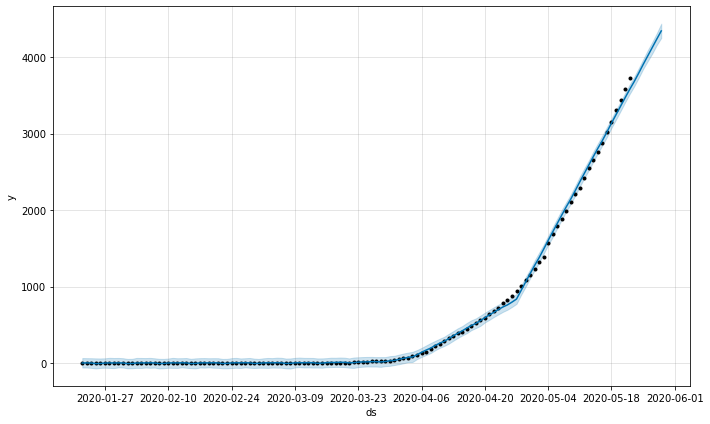

In [ ]:
deaths_plot = model.plot(forecasting)

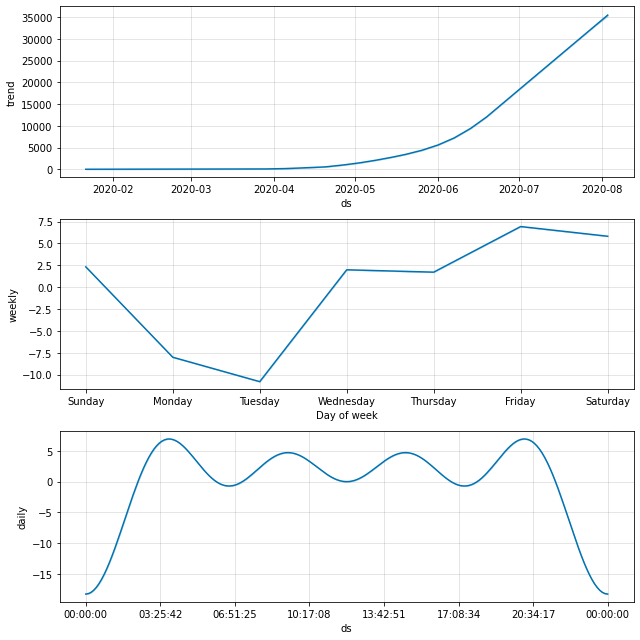

In [ ]:
fig2 = model.plot_components(forecasting)